<a href="https://colab.research.google.com/github/TKph/colab/blob/main/%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%AB%E3%82%88%E3%82%8B%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# データの読み込み


---



In [ ]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=41)

#このデータにはアルコールやリンゴ酸、色彩強度などの12個の特徴量がある.



---
# 決定木の適用


---



In [ ]:
tree = DecisionTreeClassifier(max_depth = None, criterion = 'gini', random_state = 41)  #木の深さの上限なし
tree.fit(X_train, y_train)

print(f'Train Accuracy: {tree.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {tree.score(X_test, y_test):.3f}')

#過学習になった

Train Accuracy: 1.000
Test Accuracy: 0.911


In [ ]:
import graphviz #決定木を可視化
from sklearn.tree import export_graphviz

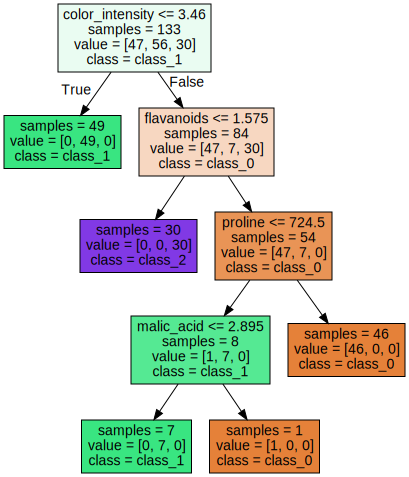

In [ ]:
dot_data = export_graphviz(tree, out_file = None, impurity = False, filled = True, feature_names = wine.feature_names, class_names = wine.target_names)

graph = graphviz.Source(dot_data)
graph

color_intensityは色彩強度. それが3.46以下のデータはすべてclass1に分類される. 次にフラバノイド(ポリフェノールの一種)に注目し, それが1.575以下のデータはすべてclass2に分類される.

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state = 41) #木の深さは3
tree.fit(X_train, y_train)

print(f'Train Accuracy: {tree.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {tree.score(X_test, y_test):.3f}')

#深さの上限がないときより汎化した

Train Accuracy: 0.992
Test Accuracy: 0.933




---
# 決定木における特徴量の重要度


---



In [ ]:
!pip install -U matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [ ]:
n_features = wine.data.shape[1]
plt.title('Feature Impotances')
plt.bar(range(n_features), tree.feature_importances_, align = 'center')
plt.xticks(range(n_features), wine.feature_names, rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



---

# 理論の説明

---



決定木は情報利得を最大にするような分割条件を作る. 情報利得とはどれだけうまく分割できたかを示す指標である. まず不純度(異なるクラスのデータがノードにどれだけ混ざっているか)の2つの計算方法, ジニ不純度と交差エントロピー誤差関数を下に示す. 正直どちらでもいいらしい. 不純度関数を試行錯誤するよりも木の深さを探索するほうが重要である.

$$ I_{gini(t)} = \sum^{C} p(i|t)(1-p(i|t)) = 1- \sum^{C}p(i|t)^2 $$
$p(i|t)$は$\frac{N_i}{N}=\frac{クラスiに属するサンプル数}{そのノードの全サンプル数}$である. 
$$ I_{entropy(t)}=-\sum^{C}p(i|t)log_2p(i|t)$$

そして情報利得は次の式で算出される.

$$ IG(D,f)=I(D)-\frac{N_{left}}{N_{親}}I(D_{left})-\frac{N_{right}}{N_親}I(D_{right}) $$

この式を最大化するので$I(D_{left})$と$I(D_{right})$を0にすればよい. つまり子ノードの不純度をできるだけ低くする. ジニ不純度を0にするには$p(i|t)^2=1$に, エントロピーを0にするにも$p(i|t)^2=1$にすればよい. つまりノードのすべてのサンプル(データ)が同じクラスに属すればよい.
